<h1 align=center><font size = 5>Capstone Project - The Battle of Neighborhoods in Toronto City</font></h1>

## Introduction/Business problem

Torornto City attracts a large number of tourists as one of the biggest cities in Canada. 
For tourists, finding the right place to eat can be a challenge, though Asian food, Middle Eastren, Mexican and many others. This is just one motive for giving tourists a good overview about what to eat where.

Thus, the goal I want to reach with this exercise is to give a simple recommendation to tourists in Toronto: in which district of the city will you find a large number or even concentration of which types of restaurants? Where to eat Mediterranean food, where to find American food, where to get fast food? The target audience are foreign tourists.

## Description of the data

I will, as requested by the assignment task, use foursquare data about venues in Toronto and extract the resturant information from it. 
Foursquare is a US tech company from New York focusing on location data. Their technology and data powers apps such as Apple's Maps, Uber, Twitter and many other household names. 
I will use foursquare data such as the restaurant name, ID, location and category of food (Asian food, vegetarian, Italian etc.).

For the Toronto neighborhood data, a Wikipedia page "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" exists that has all the information we need to explore and cluster the neighborhoods in Toronto. i will  scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format.

## Methodology
In this section, I will describe the data analysis and how I used the data to yield the results.

Starting out, I scraped data create a dataframe with the city neighbourhood of Toronto:https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M For this, I used the BeautifulSoup read function to read the table in the page. I had to clean the resulting data frame in terms of unnecessary information or data that could not be handled in a data frame. The result is a nice data frame.

Then i had to read the exact locations (Latitude & Longitude) of all Toronto Postal Code from the following link
 https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv
I have used panada readcsv functions to convert data to a nice a data frame and then merge it with my original neighbour data frame.

-->


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         235 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.4.13-~ --> conda-forge::ca-certificates-

In [3]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 17.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [5]:
from bs4 import BeautifulSoup
URL =  'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(URL)
  
soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
#print(soup.prettify())

In [6]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [7]:

df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [8]:
df.shape

(103, 3)

In [9]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [10]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Ontario are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Ontario are 43.6534817, -79.3839347.


In [11]:
!wget -q -O 'GeoSpatial_Dataset.csv' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv
print('Data downloaded!')

Data downloaded!


In [12]:
GeoSpatial_Dataset_df = pd.read_csv('GeoSpatial_Dataset.csv')
GeoSpatial_Dataset_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
GeoSpatial_Dataset_df.shape

(103, 3)

In [14]:
df_sorted=df.sort_values(by='PostalCode')
df_sorted.head()

,PostalCode,Borough,Neighborhood
6,M1B,Scarborough,"Malvern, Rouge"
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae


In [15]:
sorted_GeoSpatial_Dataset_df=GeoSpatial_Dataset_df.sort_values(by='Postal Code')
sorted_GeoSpatial_Dataset_df = GeoSpatial_Dataset_df.rename(columns={'Postal Code': 'PostalCode'})
sorted_GeoSpatial_Dataset_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
merged_df = pd.merge(df_sorted, sorted_GeoSpatial_Dataset_df,on=['PostalCode'])

## Methodology
Here is the resulted dataframe results with all neighborhoods exact locations, the i have plot Toronto map with the neighborhoods repesented over it.

-->


In [17]:
merged_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [18]:
# create map of Manhattan using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

## Methodology
Next Step, I have retrieved the foursquare data for all venues on foursquare with a distance of less than 500 meters from each centre of each neighbourhood, as indicated as blue dots in the map above. The result was a list of 2106  venues all over the city. Out of these 2106 venues (272 Unique Venue Category), 479 where restaurants. 
These 479 restaurants come from 49 unique restaurant categories, such as Italian, Vietnamese or French.
Then i grouped some similar restaurants type under one common category for better categorization, this results in 39 unique restaurant category.

-->

In [19]:
CLIENT_ID ='PZ3TWBIIZM4X1WYO3NTRE4QGMMMG0VBM4ICE3HAOXDFGDG1A' # your Foursquare ID
CLIENT_SECRET = 'NPZ2EFB0P4V2FLHSJJA1LGUBEZIOQYBORBRC2YKCX54MSNWY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500 # define radius

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
#Function to Explore Neighborhoods in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
#run the above function on each neighborhood and create a new dataframe called _Toronto_venues_
Toronto_venues = getNearbyVenues(names=merged_df['Neighborhood'],
                                   latitudes=merged_df['Latitude'],
                                   longitudes=merged_df['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Don Mills South
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
The Danforth  East
The Danforth West, Riverdale


In [23]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2106, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant


In [30]:
## Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 272 uniques categories.


In [31]:
#Create new DF Toronto_Restaurant that includes only resturant and remove all other venues
Toronto_Restaurant = Toronto_venues[Toronto_venues['Venue Category'].str.contains('Restaurant', na=False)]

In [32]:
Toronto_Restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
13,Woburn,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean BBQ Restaurant
15,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant


In [33]:
Toronto_Restaurant.shape

(479, 7)

In [34]:
## Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Toronto_Restaurant['Venue Category'].unique())))

There are 49 uniques categories.


In [35]:
#marge some values for more better grouping features--Data cleaning
Toronto_Restaurant['Venue Category'] = Toronto_Restaurant['Venue Category'].replace(['Chinese Restaurant','Taiwanese Restaurant','Thai Restaurant','Vietnamese Restaurant'],'Asian Restaurant')
Toronto_Restaurant['Venue Category'] = Toronto_Restaurant['Venue Category'].replace(['Sushi Restaurant'],'Japanese Restaurant')
Toronto_Restaurant['Venue Category'] = Toronto_Restaurant['Venue Category'].replace(['Falafel Restaurant','Moroccan Restaurant'],'Middle Eastern Restaurant')
Toronto_Restaurant['Venue Category'] = Toronto_Restaurant['Venue Category'].replace(['Korean BBQ Restaurant'],'Korean Restaurant')
Toronto_Restaurant['Venue Category'] = Toronto_Restaurant['Venue Category'].replace(['New American Restaurant'],'American Restaurant')
Toronto_Restaurant['Venue Category'] = Toronto_Restaurant['Venue Category'].replace(['Brazilian Restaurant','Caribbean Restaurant','Colombian Restaurant','Cuban Restaurant'],'Latin American Restaurant')
print('There are {} uniques categories.'.format(len(Toronto_Restaurant['Venue Category'].unique())))

There are 36 uniques categories.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [36]:
Toronto_Restaurant.groupby(['Venue Category'])['Venue'].count().reset_index().sort_values(by='Venue',ascending=False)

,Venue Category,Venue
19,Japanese Restaurant,69
29,Restaurant,64
1,Asian Restaurant,60
18,Italian Restaurant,45
0,American Restaurant,32
10,Fast Food Restaurant,30
30,Seafood Restaurant,23
24,Middle Eastern Restaurant,17
21,Latin American Restaurant,17
35,Vegetarian / Vegan Restaurant,16


<Figure size 432x288 with 0 Axes>

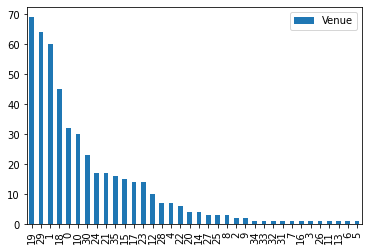

In [37]:
import matplotlib.pyplot as plt
plt.clf()
Toronto_Restaurant.groupby(['Venue Category'])['Venue'].count().reset_index().sort_values(by='Venue',ascending=False).plot(kind='bar')
plt.show()

## Methodology
To find clusters of restaurant types in the different city districts, I first transformed the data frame with the restaurant venues, associated to city districts, by one-hot encoding (0/1), as seen in the picture below.

Next, I used grouping to show the frequency of each category of restaurants in each city district.

Then, I used this information to create a data frame in which you can see the most common restaurant venue types for each city district.

Now, with all this data, I could finally run an unsupervised machine learning algorithm, more specifically, a k-means clustering algorithm from the scikit-learn package. One could use the ellbow method to systematically define the k value, but I simply chose k to be 5, having been inspired by one of the coursera courses to do so.

In [38]:
#Analayez the neighborhodd wth  one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_Restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]
Toronto_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Cajun / Creole Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13,Woburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,Cedarbrae,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Cajun / Creole Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Agincourt,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,Bayview Village,0.000000,0.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,"Bedford Park, Lawrence Manor East",0.090909,0.090909,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.0,0.090909,0.0,0.090909,0.181818,0.090909,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.181818,0.000000,0.0,0.0,0.0,0.0,0.000000
4,Berczy Park,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.0,0.083333,0.0,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0,0.083333


In [40]:
#Run K-Means Clustering for 5 clusters
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 2, 0, 0, 0, 3, 0, 0, 0], dtype=int32)

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
#new data frame with 10 most resturants 
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Resturant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Resturant'.format(ind+1))

# create a new dataframe
neighborhoods_resturants_sorted = pd.DataFrame(columns=columns)
neighborhoods_resturants_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_resturants_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_resturants_sorted.head()

,Neighborhood,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
0,Agincourt,Latin American Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Asian Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant
2,Bayview Village,Asian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
3,"Bedford Park, Lawrence Manor East",Restaurant,Italian Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,American Restaurant,Molecular Gastronomy Restaurant
4,Berczy Park,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Comfort Food Restaurant,Eastern European Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant


In [43]:
# add clustering labels
neighborhoods_resturants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
 

In [44]:
neighborhoods_resturants_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
0,3,Agincourt,Latin American Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,0,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Asian Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant
2,2,Bayview Village,Asian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
3,0,"Bedford Park, Lawrence Manor East",Restaurant,Italian Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,American Restaurant,Molecular Gastronomy Restaurant
4,0,Berczy Park,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Comfort Food Restaurant,Eastern European Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant


In [45]:

# merge toronto data with cluster and top 10 venue
toronto_Resturants_merged_df = merged_df.join(neighborhoods_resturants_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_Resturants_merged_df.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,Korean Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,3.0,Asian Restaurant,Latin American Restaurant,Hakka Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant


## Results
And here already comes the result:

What we see in the table are the city districts and their most common resturant venues, and they now have been assigned five different cluster labels from 0 to 4.

We can now use the cluster labels to show the city districts marked with a cluster-specific color on a map.

In [53]:
#drop nan values
toronto_Resturants_merged_df = toronto_Resturants_merged_df.dropna()
toronto_Resturants_merged_df = toronto_Resturants_merged_df.reset_index(drop = True)
toronto_Resturants_merged_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant
2,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,Korean Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
3,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,3.0,Asian Restaurant,Latin American Restaurant,Hakka Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
4,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,2.0,Asian Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant


In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_Resturants_merged_df['Latitude'], toronto_Resturants_merged_df['Longitude'], toronto_Resturants_merged_df['Neighborhood'], toronto_Resturants_merged_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results
Now, what is the final result of this exercise? We now can show five clusters of restaurant type concentrations for the city of Toronto, which I named according to the restaurant concentration the data shows.

Cluster-1"Red" (Italian-European & Seafood lovers)

Cluster-2"Purple" (Fast food & Vegetarian seekers)

Cluster-3"Blue" (Asian falavour)

Cluster-4"Green" (American and Latin American Time)

Cluster-5"Yellow" (A taste from Middle East)


In [48]:
#Toronoto cluster data
#toronto_Resturants_merged_df
neighborhoods_resturants_sorted_cls1 = neighborhoods_resturants_sorted[neighborhoods_resturants_sorted['Cluster Labels'] == 0]
neighborhoods_resturants_sorted_cls1.head()

,Cluster Labels,Neighborhood,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
1,0,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Asian Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant
3,0,"Bedford Park, Lawrence Manor East",Restaurant,Italian Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,American Restaurant,Molecular Gastronomy Restaurant
4,0,Berczy Park,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,Comfort Food Restaurant,Eastern European Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant
5,0,"Brockton, Parkdale Village, Exhibition Place",Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant
7,0,Central Bay Street,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,French Restaurant,Korean Restaurant,Indian Restaurant,American Restaurant


In [49]:
#Toronoto cluster data
#toronto_Resturants_merged_df
neighborhoods_resturants_sorted_cls2 = neighborhoods_resturants_sorted[neighborhoods_resturants_sorted['Cluster Labels'] == 1]
neighborhoods_resturants_sorted_cls2.head()

,Cluster Labels,Neighborhood,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
30,1,Hillcrest Village,Mediterranean Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Ethiopian Restaurant,Eastern European Restaurant
37,1,"Malvern, Rouge",Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Ethiopian Restaurant,Eastern European Restaurant
38,1,"Mimico NW, The Queensway West, South of Bloor,...",Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Ethiopian Restaurant,Eastern European Restaurant
46,1,Roselawn,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Ethiopian Restaurant,Eastern European Restaurant
48,1,"South Steeles, Silverstone, Humbergate, Jamest...",Fast Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Ethiopian Restaurant,Eastern European Restaurant


In [50]:
#Toronoto cluster data
#toronto_Resturants_merged_df
neighborhoods_resturants_sorted_cls3 = neighborhoods_resturants_sorted[neighborhoods_resturants_sorted['Cluster Labels'] == 2]
neighborhoods_resturants_sorted_cls3.head()

,Cluster Labels,Neighborhood,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
2,2,Bayview Village,Asian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
17,2,"Dorset Park, Wexford Heights, Scarborough Town...",Indian Restaurant,Asian Restaurant,Ethiopian Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
26,2,Glencairn,Asian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
32,2,"Kennedy Park, Ionview, East Birchmount Park",Asian Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
34,2,"Lawrence Manor, Lawrence Heights",Asian Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant


In [51]:
#Toronoto cluster data
#toronto_Resturants_merged_df
neighborhoods_resturants_sorted_cls4 = neighborhoods_resturants_sorted[neighborhoods_resturants_sorted['Cluster Labels'] == 3]
neighborhoods_resturants_sorted_cls4.head()

,Cluster Labels,Neighborhood,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
0,3,Agincourt,Latin American Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
6,3,Cedarbrae,Asian Restaurant,Latin American Restaurant,Hakka Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
11,3,"Cliffside, Cliffcrest, Scarborough Village West",American Restaurant,Turkish Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
15,3,Don Mills North,Japanese Restaurant,Latin American Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
19,3,Enclave of L4W,American Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant


In [52]:
#Toronoto cluster data
#toronto_Resturants_merged_df
neighborhoods_resturants_sorted_cls5 = neighborhoods_resturants_sorted[neighborhoods_resturants_sorted['Cluster Labels'] == 4]
neighborhoods_resturants_sorted_cls5.head()

,Cluster Labels,Neighborhood,1st Most Common Resturant,2nd Most Common Resturant,3rd Most Common Resturant,4th Most Common Resturant,5th Most Common Resturant,6th Most Common Resturant,7th Most Common Resturant,8th Most Common Resturant,9th Most Common Resturant,10th Most Common Resturant
18,4,"Dufferin, Dovercourt Village",Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
54,4,"The Annex, North Midtown, Yorkville",Indian Restaurant,Middle Eastern Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant
61,4,Westmount,Asian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Ethiopian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Eastern European Restaurant
62,4,"Wexford, Maryvale",Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Eastern European Restaurant


## Conclusion
We have achieved the goal presented at the outset of this project: tourists can see in the results Toronto city districts best match their food desires. This is just one example of fantastic data science uses cases one can realize applying technology which is available for free today!.